In [3]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [4]:
df = pd.read_csv("/media/gratt/20882A0F8829E44E/Users/gratt/Desktop/emsData/raceAgeFemaleAcuityTrauma.csv", index_col='PcrKey', dtype=int)

In [5]:
df

,hospCapability,initialPtAcuity,white,black,hispanic_latino,asian,americanIndian_alaskaNative,nativeHawaiian_otherPacificIslander,female,age
PcrKey,,,,,,,,,,
118170851,0,2,0,0,1,0,0,0,1,16
118170860,0,3,1,0,0,0,0,0,1,49
118170980,0,3,1,0,0,0,0,0,0,30
118171192,0,3,0,1,0,0,0,0,1,58
118171212,0,2,1,0,0,0,0,0,0,41
...,...,...,...,...,...,...,...,...,...,...
168637433,0,2,1,0,0,0,0,0,1,45
168637452,0,3,1,0,0,0,0,0,0,15
168637590,0,3,1,0,0,0,0,0,1,51


In [6]:
# investigate initial proportions here

df['initialPtAcuity'].value_counts(normalize=True)

2    0.650347
3    0.292304
4    0.056418
1    0.000930
Name: initialPtAcuity, dtype: float64

In [7]:
df['white'].value_counts(normalize=True)

1    0.683809
0    0.316191
Name: white, dtype: float64

In [8]:
df['black'].value_counts(normalize=True)

0    0.821116
1    0.178884
Name: black, dtype: float64

In [9]:
df['female'].value_counts(normalize=True)

1    0.511354
0    0.488646
Name: female, dtype: float64

In [10]:
df

,hospCapability,initialPtAcuity,white,black,hispanic_latino,asian,americanIndian_alaskaNative,nativeHawaiian_otherPacificIslander,female,age
PcrKey,,,,,,,,,,
118170851,0,2,0,0,1,0,0,0,1,16
118170860,0,3,1,0,0,0,0,0,1,49
118170980,0,3,1,0,0,0,0,0,0,30
118171192,0,3,0,1,0,0,0,0,1,58
118171212,0,2,1,0,0,0,0,0,0,41
...,...,...,...,...,...,...,...,...,...,...
168637433,0,2,1,0,0,0,0,0,1,45
168637452,0,3,1,0,0,0,0,0,0,15
168637590,0,3,1,0,0,0,0,0,1,51


Now I will make the age groups.

This is semi-arbitrary but this is what I'm going with for now:

- 0-14 (inclusive) = pediatric
- 15-39 (inclusive)= young adult
- 40-64 (inclusive)= middle aged adult
- 65+ (inclusive)= senior

In [11]:
# create new columns with groups for age

df['pediatric'] = np.where(df['age'] < 15, 1, 0)

In [12]:
df

,hospCapability,initialPtAcuity,white,black,hispanic_latino,asian,americanIndian_alaskaNative,nativeHawaiian_otherPacificIslander,female,age,pediatric
PcrKey,,,,,,,,,,,
118170851,0,2,0,0,1,0,0,0,1,16,0
118170860,0,3,1,0,0,0,0,0,1,49,0
118170980,0,3,1,0,0,0,0,0,0,30,0
118171192,0,3,0,1,0,0,0,0,1,58,0
118171212,0,2,1,0,0,0,0,0,0,41,0
...,...,...,...,...,...,...,...,...,...,...,...
168637433,0,2,1,0,0,0,0,0,1,45,0
168637452,0,3,1,0,0,0,0,0,0,15,0
168637590,0,3,1,0,0,0,0,0,1,51,0


In [13]:
df['young_adult'] = np.where((df['age'] > 14) & (df['age'] < 40), 1, 0)

In [14]:
df['middle_age_adult'] = np.where((df['age'] > 39) & (df['age'] < 65), 1, 0)
df['senior'] = np.where((df['age'] > 64), 1, 0)

In [15]:
df

,hospCapability,initialPtAcuity,white,black,hispanic_latino,asian,americanIndian_alaskaNative,nativeHawaiian_otherPacificIslander,female,age,pediatric,young_adult,middle_age_adult,senior
PcrKey,,,,,,,,,,,,,,
118170851,0,2,0,0,1,0,0,0,1,16,0,1,0,0
118170860,0,3,1,0,0,0,0,0,1,49,0,0,1,0
118170980,0,3,1,0,0,0,0,0,0,30,0,1,0,0
118171192,0,3,0,1,0,0,0,0,1,58,0,0,1,0
118171212,0,2,1,0,0,0,0,0,0,41,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168637433,0,2,1,0,0,0,0,0,1,45,0,0,1,0
168637452,0,3,1,0,0,0,0,0,0,15,0,1,0,0
168637590,0,3,1,0,0,0,0,0,1,51,0,0,1,0


In [16]:
crit = df[ df['initialPtAcuity'] == 4]

In [17]:
crit

,hospCapability,initialPtAcuity,white,black,hispanic_latino,asian,americanIndian_alaskaNative,nativeHawaiian_otherPacificIslander,female,age,pediatric,young_adult,middle_age_adult,senior
PcrKey,,,,,,,,,,,,,,
118171324,0,4,0,1,0,0,0,0,1,19,0,1,0,0
118171963,1,4,1,0,0,0,0,0,1,37,0,1,0,0
118172225,0,4,1,0,0,0,0,0,1,25,0,1,0,0
118172592,0,4,1,0,0,0,0,0,1,91,0,0,0,1
118255842,1,4,0,0,1,0,0,0,0,27,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168631386,0,4,0,0,0,0,0,1,1,80,0,0,0,1
168631542,1,4,1,0,0,0,0,0,1,9,1,0,0,0
168631858,1,4,1,0,0,0,0,0,0,21,0,1,0,0


In [18]:
# number patients critically injured who were transported to a trauma center

success = crit['hospCapability'].value_counts()
print(success)

0    63829
1    44214
Name: hospCapability, dtype: int64


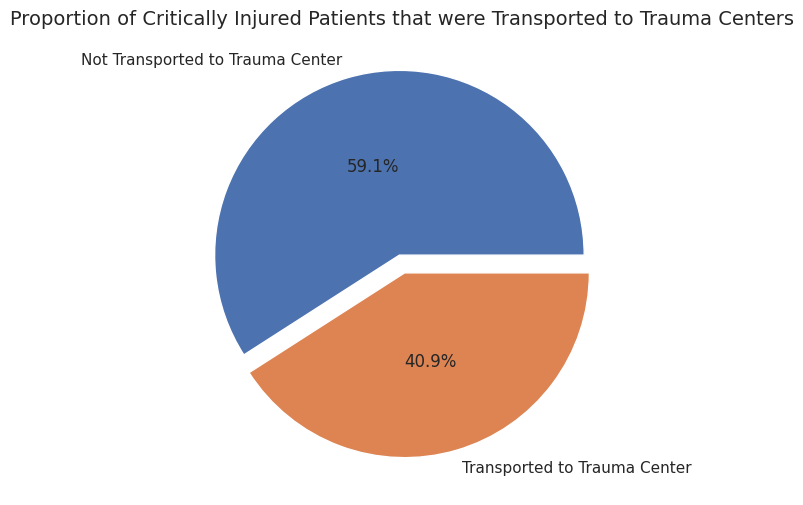

In [40]:
# Figure 1

pie, ax = plt.subplots(figsize=[10,6])
labels = ['Not Transported to Trauma Center' ,'Transported to Trauma Center']
plt.pie(x=success, autopct="%.1f%%", explode=[0.05]*2, labels=labels, pctdistance=0.5)
plt.title("Proportion of Critically Injured Patients that were Transported to Trauma Centers", fontsize=14)
pie.savefig("../imgs/CritToTraumaPieChart.png")

In [49]:
# proportion of patients critically injuired who were transported to a trauma center
crit['hospCapability'].value_counts(normalize= True)

0    0.590774
1    0.409226
Name: hospCapability, dtype: float64

In [20]:
# get race back into 1 column so we can make a graph of dataset demographics

crit

,hospCapability,initialPtAcuity,white,black,hispanic_latino,asian,americanIndian_alaskaNative,nativeHawaiian_otherPacificIslander,female,age,pediatric,young_adult,middle_age_adult,senior
PcrKey,,,,,,,,,,,,,,
118171324,0,4,0,1,0,0,0,0,1,19,0,1,0,0
118171963,1,4,1,0,0,0,0,0,1,37,0,1,0,0
118172225,0,4,1,0,0,0,0,0,1,25,0,1,0,0
118172592,0,4,1,0,0,0,0,0,1,91,0,0,0,1
118255842,1,4,0,0,1,0,0,0,0,27,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168631386,0,4,0,0,0,0,0,1,1,80,0,0,0,1
168631542,1,4,1,0,0,0,0,0,1,9,1,0,0,0
168631858,1,4,1,0,0,0,0,0,0,21,0,1,0,0


In [24]:
# shows count of races

crit.apply(pd.value_counts)

,hospCapability,initialPtAcuity,white,black,hispanic_latino,asian,americanIndian_alaskaNative,nativeHawaiian_otherPacificIslander,female,age,pediatric,young_adult,middle_age_adult,senior
0,63829.0,NaN,36582.0,86798.0,94536.0,106555.0,106327.0,107707.0,70328.0,NaN,101990.0,67118.0,76027.0,78994.0
1,44214.0,NaN,71461.0,21245.0,13507.0,1488.0,1716.0,336.0,37715.0,500.0,6053.0,40925.0,32016.0,29049.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,487.0,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,489.0,NaN,NaN,NaN,NaN
4,NaN,108043.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,388.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN
117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN
119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN


In [29]:
# race numbers copied from value counts - TOTAL

race_counts = [71461.0, 21245.0, 13507.0, 1488.0, 1716.0, 336.0]
# change to ints'
race_counts = [int(x) for x in race_counts]
race_counts


[71461, 21245, 13507, 1488, 1716, 336]

In [37]:
race_labels = ['White',
 'Black',
 'Hispanic / Latino',
 'Asian',
 'American Indian / Alaskan Native',
 'Native Hawaiian / Pacific Islander']

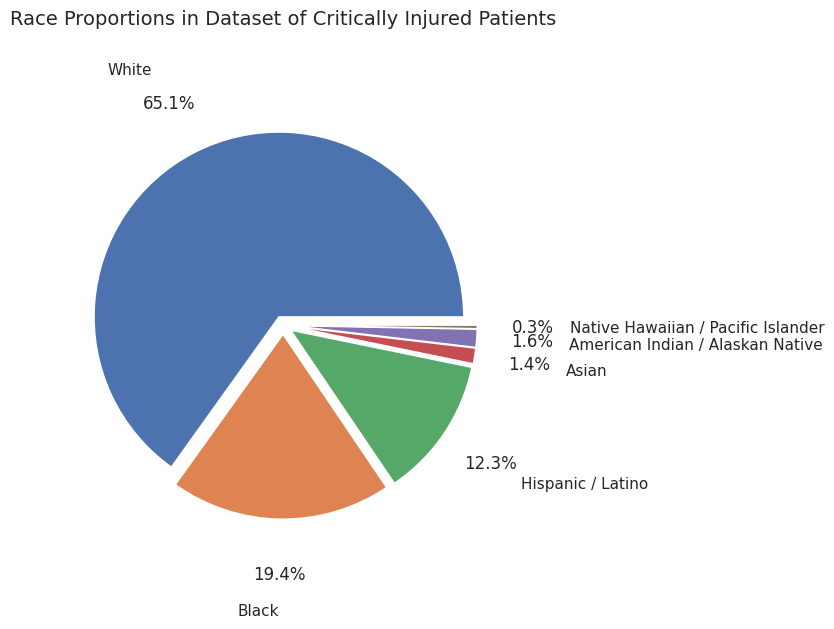

In [65]:
# Figure 1

pie, ax = plt.subplots(figsize=[10,6])
labels = race_labels
plt.pie(x=race_counts, autopct="%.1f%%", explode=[0.05]*6, labels=labels, pctdistance=1.3, labeldistance=1.5)
plt.title("Race Proportions in Dataset of Critically Injured Patients", fontsize=14, loc='center', pad=50)


pie.savefig("../imgs/raceProportions1.png")

In [68]:
# now do race proportions in subset where the patient was transported to trauma
success = crit[ crit['hospCapability'] == 1 ]
success

,hospCapability,initialPtAcuity,white,black,hispanic_latino,asian,americanIndian_alaskaNative,nativeHawaiian_otherPacificIslander,female,age,pediatric,young_adult,middle_age_adult,senior
PcrKey,,,,,,,,,,,,,,
118171963,1,4,1,0,0,0,0,0,1,37,0,1,0,0
118255842,1,4,0,0,1,0,0,0,0,27,0,1,0,0
118256299,1,4,1,0,0,0,0,0,0,30,0,1,0,0
118258648,1,4,0,1,0,0,0,0,0,46,0,0,1,0
118275238,1,4,0,1,0,0,0,0,0,24,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168630764,1,4,1,0,0,0,0,0,0,60,0,0,1,0
168631270,1,4,1,0,0,0,0,0,0,12,1,0,0,0
168631376,1,4,1,0,0,0,0,0,1,81,0,0,0,1


In [69]:
success.apply(pd.value_counts)

,hospCapability,initialPtAcuity,white,black,hispanic_latino,asian,americanIndian_alaskaNative,nativeHawaiian_otherPacificIslander,female,age,pediatric,young_adult,middle_age_adult,senior
0,NaN,NaN,15039.0,35396.0,38569.0,43622.0,43657.0,44092.0,30685.0,NaN,42355.0,24682.0,30512.0,35093.0
1,44214.0,NaN,29175.0,8818.0,5645.0,592.0,557.0,122.0,13529.0,116.0,1859.0,19532.0,13702.0,9121.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,118.0,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,144.0,NaN,NaN,NaN,NaN
4,NaN,44214.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN
117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN
119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN


In [70]:
# race numbers copied from value counts - SUCCESS

race_counts = [29175.0,	8818.0,	5645.0,	592.0,	557.0,	122.0]
# change to ints'
race_counts = [int(x) for x in race_counts]
race_counts

[29175, 8818, 5645, 592, 557, 122]

In [71]:
race_labels = ['White',
 'Black',
 'Hispanic / Latino',
 'Asian',
 'American Indian / Alaskan Native',
 'Native Hawaiian / Pacific Islander']

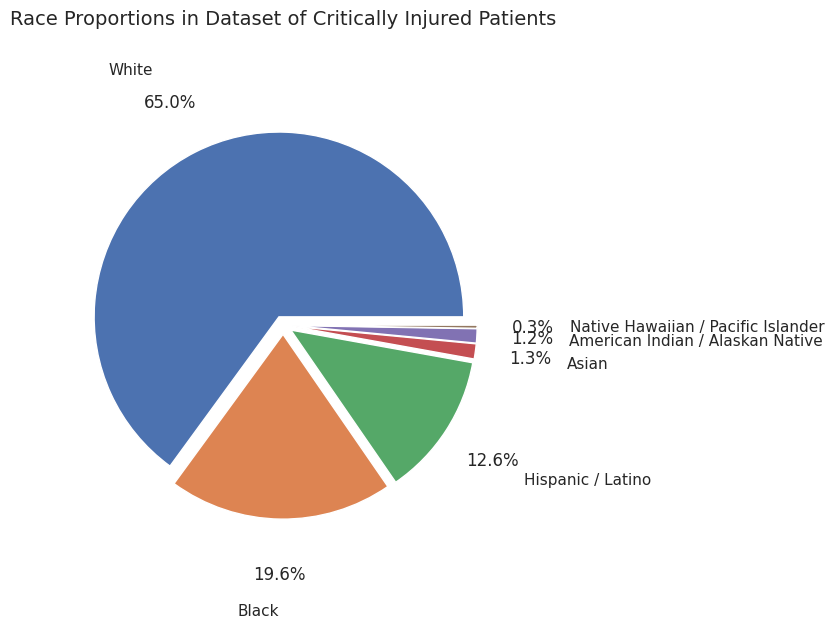

In [72]:
# Figure 3

pie, ax = plt.subplots(figsize=[10,6])
labels = race_labels
plt.pie(x=race_counts, autopct="%.1f%%", explode=[0.05]*6, labels=labels, pctdistance=1.3, labeldistance=1.5)
plt.title("Race Proportions in Dataset of Critically Injured Patients", fontsize=14, loc='center', pad=50)


pie.savefig("../imgs/raceProportions2.png")

In [73]:
# very little difference here as you can see

In [34]:
critblack['hospCapability'].value_counts()

0    12427
1     8818
Name: hospCapability, dtype: int64

In [35]:
critblack['hospCapability'].value_counts(normalize=True)

0    0.584938
1    0.415062
Name: hospCapability, dtype: float64

In [36]:
crit.columns

Index(['hospCapability', 'initialPtAcuity', 'white', 'black',
       'hispanic_latino', 'asian', 'americanIndian_alaskaNative',
       'nativeHawaiian_otherPacificIslander', 'sex', 'age'],
      dtype='object')

In [50]:
crit

,hospCapability,initialPtAcuity,white,black,hispanic_latino,asian,americanIndian_alaskaNative,nativeHawaiian_otherPacificIslander,female,age,pediatric,young_adult,middle_age_adult,senior
PcrKey,,,,,,,,,,,,,,
118171324,0,4,0,1,0,0,0,0,1,19,0,1,0,0
118171963,1,4,1,0,0,0,0,0,1,37,0,1,0,0
118172225,0,4,1,0,0,0,0,0,1,25,0,1,0,0
118172592,0,4,1,0,0,0,0,0,1,91,0,0,0,1
118255842,1,4,0,0,1,0,0,0,0,27,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168631386,0,4,0,0,0,0,0,1,1,80,0,0,0,1
168631542,1,4,1,0,0,0,0,0,1,9,1,0,0,0
168631858,1,4,1,0,0,0,0,0,0,21,0,1,0,0


In [52]:
crit = crit.rename(columns={'hospCapability':'transportedtoTraumaCenter'})
crit

,transportedtoTraumaCenter,initialPtAcuity,white,black,hispanic_latino,asian,americanIndian_alaskaNative,nativeHawaiian_otherPacificIslander,female,age,pediatric,young_adult,middle_age_adult,senior
PcrKey,,,,,,,,,,,,,,
118171324,0,4,0,1,0,0,0,0,1,19,0,1,0,0
118171963,1,4,1,0,0,0,0,0,1,37,0,1,0,0
118172225,0,4,1,0,0,0,0,0,1,25,0,1,0,0
118172592,0,4,1,0,0,0,0,0,1,91,0,0,0,1
118255842,1,4,0,0,1,0,0,0,0,27,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168631386,0,4,0,0,0,0,0,1,1,80,0,0,0,1
168631542,1,4,1,0,0,0,0,0,1,9,1,0,0,0
168631858,1,4,1,0,0,0,0,0,0,21,0,1,0,0


- base linear regression model
- this model is technically ANOVA (analysis-of-variance) because it only contains dummy explanatory variables
- in order to avoid having p|erfect multi-colinearity in the model, we will omit 1 group per dummy variable
    - for race we will omit white
    - for female (sex) we're omitting male
    - for age group we're omiting young adult (16-39)
- Our initial model: 

$ transportedtoTraumaCenter = \beta0 + \beta1female + \beta2black + \beta3hispanic_latino + \beta4asian + \beta5americanIndian_alaskaNative + \beta6nativeHawaiian_otherPacificIslander + \beta7pediatric + \beta8middle_age_adult + \beta9senior $

In [53]:
mod = smf.ols(formula = 'transportedtoTraumaCenter ~ female + black + hispanic_latino + asian + americanIndian_alaskaNative + nativeHawaiian_otherPacificIslander + pediatric + middle_age_adult + senior', data = crit).fit()

In [54]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     transportedtoTraumaCenter   R-squared:                       0.025
Model:                                   OLS   Adj. R-squared:                  0.024
Method:                        Least Squares   F-statistic:                     302.2
Date:                       Mon, 07 Nov 2022   Prob (F-statistic):               0.00
Time:                               06:38:14   Log-Likelihood:                -75263.
No. Observations:                     108043   AIC:                         1.505e+05
Df Residuals:                         108033   BIC:                         1.506e+05
Df Model:                                  9                                         
Covariance Type:                   nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               0.5111      0.003    168.426      0.000       0.505       0.517
female                                 -0.0562      0.003    -17.838      0.000      -0.062      -0.050
black                                  -0.0352      0.004     -8.989      0.000      -0.043      -0.028
hispanic_latino                        -0.0286      0.005     -6.145      0.000      -0.038      -0.019
asian                                  -0.0041      0.013     -0.325      0.745      -0.029       0.021
americanIndian_alaskaNative            -0.1115      0.012     -9.371      0.000      -0.135      -0.088
nativeHawaiian_otherPacificIslander    -0.0489      0.027     -1.835      0.066      -0.101       0.003
pediatric                              -0.1647      0.007    -24.592      0.000      -0.178      -0.152
middle_age_adult                       -0.0547      0.004    -14.910      0.000      -0.062      -0.047
senior                                 -0.1649      0.004    -41.916      0.000      -0.173      -0.157
==============================================================================
Omnibus:                   433121.592   Durbin-Watson:                   1.776
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16418.388
Skew:                           0.352   Prob(JB):                         0.00
Kurtosis:                       1.225   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$ log(transportedtoTraumaCenter) = \beta0 + \beta1female + \beta2black + \beta3hispanic_latino + \beta4asian + \beta5americanIndian_alaskaNative + \beta6nativeHawaiian_otherPacificIslander + \beta7pediatric + \beta8middle_age_adult + \beta9senior $

In [56]:
mod2 = smf.logit(formula = 'transportedtoTraumaCenter ~ female + black + hispanic_latino + asian + americanIndian_alaskaNative + nativeHawaiian_otherPacificIslander + pediatric + middle_age_adult + senior', data = crit).fit()

Optimization terminated successfully.
         Current function value: 0.664082
         Iterations 5


In [57]:
mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                              
=====================================================================================
Dep. Variable:     transportedtoTraumaCenter   No. Observations:               108043
Model:                                 Logit   Df Residuals:                   108033
Method:                                  MLE   Df Model:                            9
Date:                       Mon, 07 Nov 2022   Pseudo R-squ.:                 0.01847
Time:                               06:50:33   Log-Likelihood:                -71749.
converged:                              True   LL-Null:                       -73099.
Covariance Type:                   nonrobust   LLR p-value:                     0.000
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               0.0523      0.013      4.131      0.000       0.027       0.077
female                                 -0.2404      0.013    -17.849      0.000      -0.267      -0.214
black                                  -0.1482      0.017     -8.955      0.000      -0.181      -0.116
hispanic_latino                        -0.1209      0.020     -6.158      0.000      -0.159      -0.082
asian                                  -0.0201      0.054     -0.370      0.712      -0.127       0.086
americanIndian_alaskaNative            -0.4872      0.053     -9.233      0.000      -0.591      -0.384
nativeHawaiian_otherPacificIslander    -0.2214      0.116     -1.910      0.056      -0.449       0.006
pediatric                              -0.7032      0.030    -23.699      0.000      -0.761      -0.645
middle_age_adult                       -0.2227      0.015    -14.609      0.000      -0.253      -0.193
senior                                 -0.6996      0.017    -41.303      0.000      -0.733      -0.666
=======================================================================================================
"""